In [2]:
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.5 MB/s eta 0:00:00


In [8]:
!pip install keras-squeezenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-py3-none-any.whl size=3573 sha256=76b0e7b376ad447fe4ae6a01412f55490ac0217ae6097b235dd79fc28dc9b1a5
  Stored in directory: /root/.cache/pip/wheels/f1/d0/32/6d82b57a8253f794375a32359dd2f9ee02a6089cad2222bd78
Successfully built keras-squeezenet


In [16]:
#"Model Training"


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, accuracy_score
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, concatenate, GlobalAveragePooling2D, Dropout, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation

def fire_module(x, s1, e1, e3):
    
    squeeze = Conv2D(s1, (1, 1), padding='same', activation='relu')(x)
    expand1x1 = Conv2D(e1, (1, 1), padding='same', activation='relu')(squeeze)
    expand3x3 = Conv2D(e3, (3, 3), padding='same', activation='relu')(squeeze)
    
    output = concatenate([expand1x1, expand3x3], axis=-1)
    
    return output

def SqueezeNet(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='valid', activation='relu')(input_tensor)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, 16, 64, 64)
    x = fire_module(x, 16, 64, 64)
    x = MaxPool2D(pool_size=(3, 3), strides=(2, 2))(x)
    x = fire_module(x, 32, 128, 128)
    x = fire_module(x, 32, 128, 128)
    x = Dropout(0.5)(x)
    x = Conv2D(num_classes, (1, 1), padding='valid')(x)
    x = GlobalAveragePooling2D()(x)
    output = Activation('softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    
    return model

input_shape = (224, 224, 3)  
num_classes = 15  

model = SqueezeNet(input_shape, num_classes)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255)  
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/training', target_size=input_shape[:2], batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory('/kaggle/input/dataset-ruet/basedata/basedata/validation', target_size=input_shape[:2], batch_size=32, class_mode='categorical')

history = model.fit(train_generator, epochs=50, validation_data=valid_generator)


Found 6355 images belonging to 15 classes.
Found 270 images belonging to 15 classes.
Epoch 1/50


2023-09-29 16:20:43.013777: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


199/199 [==============================] - 33s 144ms/step - loss: 2.6016 - accuracy: 0.1435 - val_loss: 3.0361 - val_accuracy: 0.0704
Epoch 2/50
199/199 [==============================] - 26s 132ms/step - loss: 2.3225 - accuracy: 0.2014 - val_loss: 2.5003 - val_accuracy: 0.1333
Epoch 3/50
199/199 [==============================] - 27s 133ms/step - loss: 2.1537 - accuracy: 0.2305 - val_loss: 2.3514 - val_accuracy: 0.1259
Epoch 4/50
199/199 [==============================] - 26s 130ms/step - loss: 2.0597 - accuracy: 0.2596 - val_loss: 2.0667 - val_accuracy: 0.2519
Epoch 5/50
199/199 [==============================] - 26s 132ms/step - loss: 1.9920 - accuracy: 0.2810 - val_loss: 1.9073 - val_accuracy: 0.2741
Epoch 6/50
199/199 [==============================] - 27s 133ms/step - loss: 1.7720 - accuracy: 0.3655 - val_loss: 1.8313 - val_accuracy: 0.3333
Epoch 7/50
199/199 [==============================] - 27s 133ms/step - loss: 1.6721 - accuracy: 0.4090 - val_loss: 1.4528 - val_accuracy: 0.4

Loss values: [[  2.60163617]
 [  2.32253814]
 [  2.1537199 ]
 [  2.05967379]
 [  1.99203026]
 [  1.77202272]
 [  1.67212868]
 [  1.58006918]
 [  1.4775306 ]
 [  1.59927356]
 [  1.99935782]
 [  2.82272387]
 [  3.94159722]
 [  6.77418566]
 [  4.94698524]
 [ 11.77066422]
 [ 22.3574028 ]
 [ 32.77567291]
 [ 57.11110687]
 [ 62.39114761]
 [100.5958786 ]
 [ 80.39676666]
 [141.02029419]
 [181.04040527]
 [121.82041931]
 [198.45814514]
 [200.26029968]
 [232.90596008]
 [305.26470947]
 [388.39434814]
 [270.11810303]
 [307.70281982]
 [404.57910156]
 [419.18438721]
 [234.51473999]
 [516.39813232]
 [296.07131958]
 [539.41796875]
 [498.25003052]
 [438.59973145]
 [765.70141602]
 [897.60284424]
 [631.66558838]
 [434.68136597]
 [596.76965332]
 [453.46109009]
 [575.53710938]
 [807.87921143]
 [802.49780273]
 [848.84875488]]
Accuracy values: [[0.14350905]
 [0.20141621]
 [0.23052715]
 [0.25963807]
 [0.28103855]
 [0.36553895]
 [0.40896931]
 [0.47159716]
 [0.54634148]
 [0.57010227]
 [0.57498032]
 [0.57340676]
 

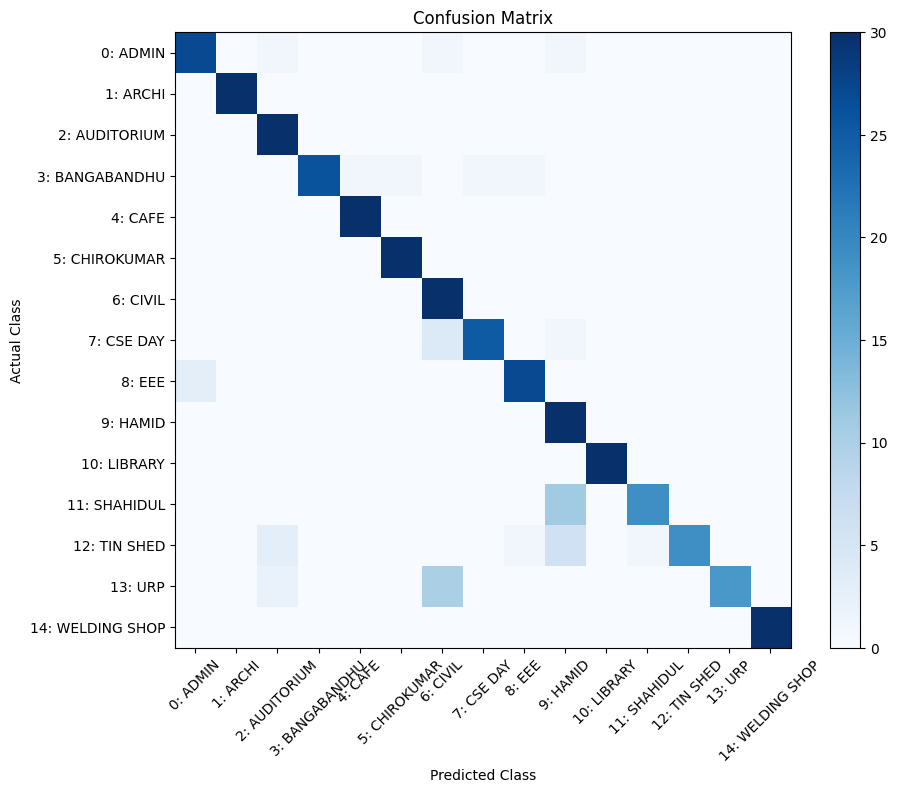

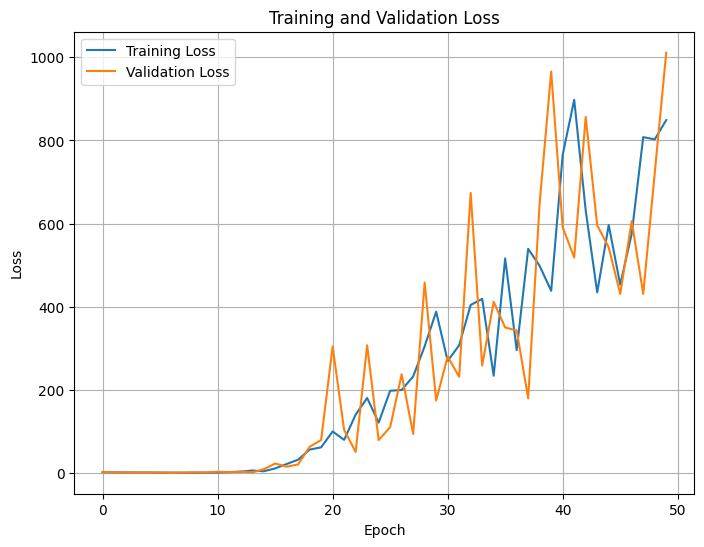

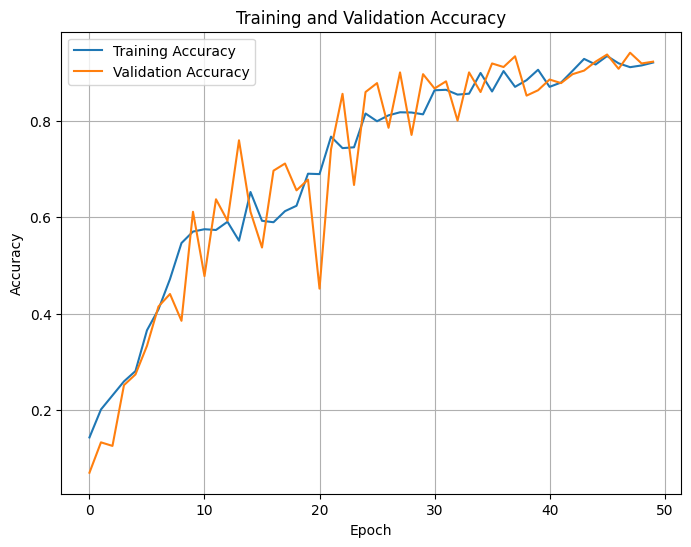

In [17]:
#"Testing/Prediction"


model_dir = '/kaggle/working/model_study/EfficientNetB0'
os.makedirs(model_dir, exist_ok=True)

model.save(os.path.join(model_dir, 'my_model_EfficientNetB0.h5'))

loss_values = np.array(history.history['loss']).reshape(-1, 1)
accuracy_values = np.array(history.history['accuracy']).reshape(-1, 1)
val_loss_values = np.array(history.history['val_loss']).reshape(-1, 1)
val_accuracy_values = np.array(history.history['val_accuracy']).reshape(-1, 1)

file_name = 'EfficientNetB0.csv'

results = np.column_stack((loss_values, accuracy_values, val_loss_values, val_accuracy_values))

csv_file_path = os.path.join(model_dir, file_name)
np.savetxt(csv_file_path, results, delimiter=',', header='Loss,Accuracy,Validation Loss,Validation Accuracy', comments='')

print("Loss values:", loss_values)
print("Accuracy values:", accuracy_values)
print("Validation loss values:", val_loss_values)
print("Validation accuracy values:", val_accuracy_values)
print("CSV file saved at:", csv_file_path)

test_data_dir = '/kaggle/input/dataset-ruet/basedata/basedata/testing'
test_images = []
ground_truth_labels = []
for class_name in os.listdir(test_data_dir):
    class_dir = os.path.join(test_data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        img = image.load_img(image_path, target_size=(224, 224))  
        img_array = image.img_to_array(img)
        img_array /= 255.0
        test_images.append(img_array)
        ground_truth_labels.append(class_name)

test_images = np.array(test_images)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

label_to_index = {label: i for i, label in enumerate(train_generator.class_indices)}
ground_truth_indices = np.array([label_to_index[label] for label in ground_truth_labels])

class_names = list(train_generator.class_indices.keys())
class_numbers = [label_to_index[label] for label in class_names]

conf_matrix = confusion_matrix(ground_truth_indices, predicted_labels)

accuracy = accuracy_score(ground_truth_indices, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)

plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(train_generator.class_indices))
plt.xticks(tick_marks, [f"{class_numbers[i]}: {class_names[i]}" for i in tick_marks], rotation=45)
plt.yticks(tick_marks, [f"{class_numbers[i]}: {class_names[i]}" for i in tick_marks])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid()
plt.show()



In [18]:

#"Performance Matrix Calculation"


from sklearn.metrics import confusion_matrix, accuracy_score

num_classes = conf_matrix.shape[0]

precisions = []
recalls = []
f1_scores = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

print("Class Precisions:", precisions)
print("Class Recalls:", recalls)
print("Class F1 Scores:", f1_scores)

from sklearn.metrics import precision_score, recall_score, f1_score

micro_precision = precision_score(ground_truth_indices, predicted_labels, average='micro')
micro_recall = recall_score(ground_truth_indices, predicted_labels, average='micro')
micro_f1 = f1_score(ground_truth_indices, predicted_labels, average='micro')
print("Micro-Precision:", micro_precision)
print("Micro-Recall:", micro_recall)
print("Micro-F1:", micro_f1)

top_1_accuracy = accuracy_score(ground_truth_indices, predicted_labels)
top_5_predictions = np.argsort(predictions, axis=1)[:, -5:]  
top_5_accuracy = np.mean(np.array([ground_truth_indices[i] in top_5_predictions[i] for i in range(len(ground_truth_indices))]))

print("Top-1 Accuracy:", top_1_accuracy)
print("Top-5 Accuracy:", top_5_accuracy)


Class Precisions: [0.9, 1.0, 0.8333333333333334, 1.0, 0.967741935483871, 0.967741935483871, 0.6666666666666666, 0.9615384615384616, 0.9310344827586207, 0.6122448979591837, 1.0, 0.95, 1.0, 1.0, 1.0]
Class Recalls: [0.9, 1.0, 1.0, 0.8666666666666667, 1.0, 1.0, 1.0, 0.8333333333333334, 0.9, 1.0, 1.0, 0.6333333333333333, 0.6333333333333333, 0.6, 1.0]
Class F1 Scores: [0.9, 1.0, 0.9090909090909091, 0.9285714285714286, 0.9836065573770492, 0.9836065573770492, 0.8, 0.8928571428571429, 0.9152542372881356, 0.759493670886076, 1.0, 0.7599999999999999, 0.7755102040816326, 0.7499999999999999, 1.0]
Micro-Precision: 0.8911111111111111
Micro-Recall: 0.8911111111111111
Micro-F1: 0.8911111111111111
Top-1 Accuracy: 0.8911111111111111
Top-5 Accuracy: 0.9666666666666667


In [19]:
#"Performance Matrix Calculation"

from sklearn.metrics import confusion_matrix, accuracy_score

num_classes = conf_matrix.shape[0]

class_metrics = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
   
    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

    class_metrics.append({
        'Class': i + 1,
        'True Positives': true_positives,
        'True Negatives': true_negatives,
        'False Positives': false_positives,
        'False Negatives': false_negatives,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    })

average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1_score = sum(f1_scores) / len(f1_scores)
average_accuracy = sum(accuracies) / len(accuracies)

print("Class Metrics:")
for metrics in class_metrics:
    print(f"Class {metrics['Class']} - Precision: {metrics['Precision']}, Recall: {metrics['Recall']}, F1 Score: {metrics['F1 Score']}, Accuracy: {metrics['Accuracy']}")
    print(f"TTP: {metrics['True Positives']}, TTN: {metrics['True Negatives']}, TFP: {metrics['False Positives']}, TFN: {metrics['False Negatives']}")
    print("")

print("Average Precision:", average_precision)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1_score)
print("Average Accuracy:", average_accuracy)


Class Metrics:
Class 1 - Precision: 0.9, Recall: 0.9, F1 Score: 0.9, Accuracy: 0.9866666666666667
TTP: 27, TTN: 417, TFP: 3, TFN: 3

Class 2 - Precision: 1.0, Recall: 1.0, F1 Score: 1.0, Accuracy: 1.0
TTP: 30, TTN: 420, TFP: 0, TFN: 0

Class 3 - Precision: 0.8333333333333334, Recall: 1.0, F1 Score: 0.9090909090909091, Accuracy: 0.9866666666666667
TTP: 30, TTN: 414, TFP: 6, TFN: 0

Class 4 - Precision: 1.0, Recall: 0.8666666666666667, F1 Score: 0.9285714285714286, Accuracy: 0.9911111111111112
TTP: 26, TTN: 420, TFP: 0, TFN: 4

Class 5 - Precision: 0.967741935483871, Recall: 1.0, F1 Score: 0.9836065573770492, Accuracy: 0.9977777777777778
TTP: 30, TTN: 419, TFP: 1, TFN: 0

Class 6 - Precision: 0.967741935483871, Recall: 1.0, F1 Score: 0.9836065573770492, Accuracy: 0.9977777777777778
TTP: 30, TTN: 419, TFP: 1, TFN: 0

Class 7 - Precision: 0.6666666666666666, Recall: 1.0, F1 Score: 0.8, Accuracy: 0.9666666666666667
TTP: 30, TTN: 405, TFP: 15, TFN: 0

Class 8 - Precision: 0.9615384615384616,

In [20]:
#"Testing/Prediction"

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

num_classes = conf_matrix.shape[0]

class_names = [
    'ADMIN', 'ARCHI', 'AUDITORIUM', 'BANGABANDHU', 'CAFE',
    'CHIROKUMAR', 'CIVIL', 'CSE DAY', 'EEE', 'HAMID',
    'LIBRARY', 'SHAHIDUL', 'TIN SHED', 'URP', 'WELDING SHOP'
]

class_metrics = []
precisions = []
recalls = []
f1_scores = []
accuracies = []

for i in range(num_classes):
    true_positives = conf_matrix[i, i]
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives
    true_negatives = np.sum(conf_matrix) - true_positives - false_positives - false_negatives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
   
    if precision == 0 and recall == 0:
        f1_score = 0.0
    else:
        f1_score = 2 * (precision * recall) / (precision + recall)

    accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

    class_metrics.append({
        'Class': class_names[i],
        'TTP': true_positives,
        'TTN': true_negatives,
        'TFP': false_positives,
        'TFN': false_negatives,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy
    })

average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1_score = sum(f1_scores) / len(f1_scores)
average_accuracy = sum(accuracies) / len(accuracies)

class_metrics.append({
    'Class': 'Average',
    'TTP': '',  
    'TTN': '',
    'TFP': '',
    'TFN': '',
    'Precision': average_precision,
    'Recall': average_recall,
    'F1 Score': average_f1_score,
    'Accuracy': average_accuracy
})

metrics_df = pd.DataFrame(class_metrics)

metrics_df = metrics_df[['Class', 'TTP', 'TTN', 'TFP', 'TFN', 'Precision', 'Recall', 'F1 Score', 'Accuracy']]

print(metrics_df)


           Class TTP  TTN TFP TFN  Precision    Recall  F1 Score  Accuracy
0          ADMIN  27  417   3   3   0.900000  0.900000  0.900000  0.986667
1          ARCHI  30  420   0   0   1.000000  1.000000  1.000000  1.000000
2     AUDITORIUM  30  414   6   0   0.833333  1.000000  0.909091  0.986667
3    BANGABANDHU  26  420   0   4   1.000000  0.866667  0.928571  0.991111
4           CAFE  30  419   1   0   0.967742  1.000000  0.983607  0.997778
5     CHIROKUMAR  30  419   1   0   0.967742  1.000000  0.983607  0.997778
6          CIVIL  30  405  15   0   0.666667  1.000000  0.800000  0.966667
7        CSE DAY  25  419   1   5   0.961538  0.833333  0.892857  0.986667
8            EEE  27  418   2   3   0.931034  0.900000  0.915254  0.988889
9          HAMID  30  401  19   0   0.612245  1.000000  0.759494  0.957778
10       LIBRARY  30  420   0   0   1.000000  1.000000  1.000000  1.000000
11      SHAHIDUL  19  419   1  11   0.950000  0.633333  0.760000  0.973333
12      TIN SHED  19  420